##Diagonal Spread 전략
Diagonal Spread 전략은 만기일과 행사가격이 다른 두 옵션을 매수하고 매도하는 전략입니다. ㅍ

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-7734b5fca627>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-7734b5fca627>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Long Call Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_buy,
<ipython-input-1-7734b5fca627>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

            Stock Price  Stock Return  Diagonal Spread Profit  \
Date                                                            
2023-01-03   125.070000      0.000000                    -2.0   
2023-01-04   126.360001      0.010314                    -2.0   
2023-01-05   125.019997     -0.010605                    -2.0   
2023-01-06   129.619995      0.036794                    -2.0   
2023-01-09   130.149994      0.004089                    -2.0   
...                 ...           ...                     ...   
2023-12-22   193.600006     -0.005547                     8.0   
2023-12-26   193.050003     -0.002841                     8.0   
2023-12-27   193.149994      0.000518                     8.0   
2023-12-28   193.580002      0.002226                     8.0   
2023-12-29   192.529999     -0.005424                     8.0   

            Diagonal Spread Return  
Date                                
2023-01-03                0.000000  
2023-01-04               -0.015991  
2023-0

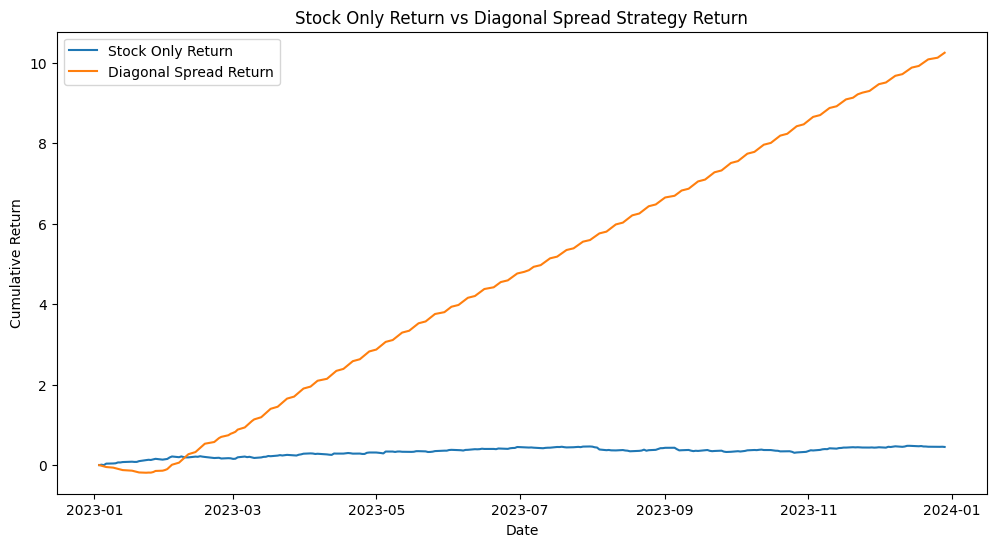

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Diagonal Spread 설정
strike_price_buy = 140
strike_price_sell = 150
premium_paid_long = 5   # 장기 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_short = 3  # 단기 콜 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Diagonal Spread 수익 계산 함수
def calculate_diagonal_spread(stock_data, strike_price_buy, strike_price_sell, premium_paid_long, premium_received_short):
    # 콜 옵션 손익 계산 (만기일까지의 데이터로 가정)
    stock_data['Long Call Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_buy,
                                                   stock_data['Stock Price'] - strike_price_buy,
                                                   0) - premium_paid_long
    stock_data['Short Call Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_sell,
                                                    strike_price_sell - stock_data['Stock Price'],
                                                    0) + premium_received_short

    # Diagonal Spread 전략의 총 수익 계산
    stock_data['Diagonal Spread Profit'] = stock_data['Long Call Profit/Loss'] + stock_data['Short Call Profit/Loss']

    # 총 수익률 계산
    stock_data['Diagonal Spread Return'] = stock_data['Diagonal Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Diagonal Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
diagonal_spread_results = calculate_diagonal_spread(data, strike_price_buy, strike_price_sell, premium_paid_long, premium_received_short)

# 결과 출력
print(diagonal_spread_results[['Stock Price', 'Stock Return', 'Diagonal Spread Profit', 'Diagonal Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(diagonal_spread_results.index, diagonal_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(diagonal_spread_results.index, diagonal_spread_results['Diagonal Spread Return'].cumsum(), label='Diagonal Spread Return')
plt.title('Stock Only Return vs Diagonal Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-ef82d9bee8e2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-2-ef82d9bee8e2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Long Put Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_buy,
<ipython-input-2-ef82d9bee8e2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

            Stock Price  Stock Return  Diagonal Spread Profit  \
Date                                                            
2023-01-03   125.070000      0.000000                8.000000   
2023-01-04   126.360001      0.010314                8.000000   
2023-01-05   125.019997     -0.010605                8.000000   
2023-01-06   129.619995      0.036794                8.000000   
2023-01-09   130.149994      0.004089                7.850006   
...                 ...           ...                     ...   
2023-12-22   193.600006     -0.005547               -2.000000   
2023-12-26   193.050003     -0.002841               -2.000000   
2023-12-27   193.149994      0.000518               -2.000000   
2023-12-28   193.580002      0.002226               -2.000000   
2023-12-29   192.529999     -0.005424               -2.000000   

            Diagonal Spread Return  
Date                                
2023-01-03                0.000000  
2023-01-04                0.063964  
2023-0

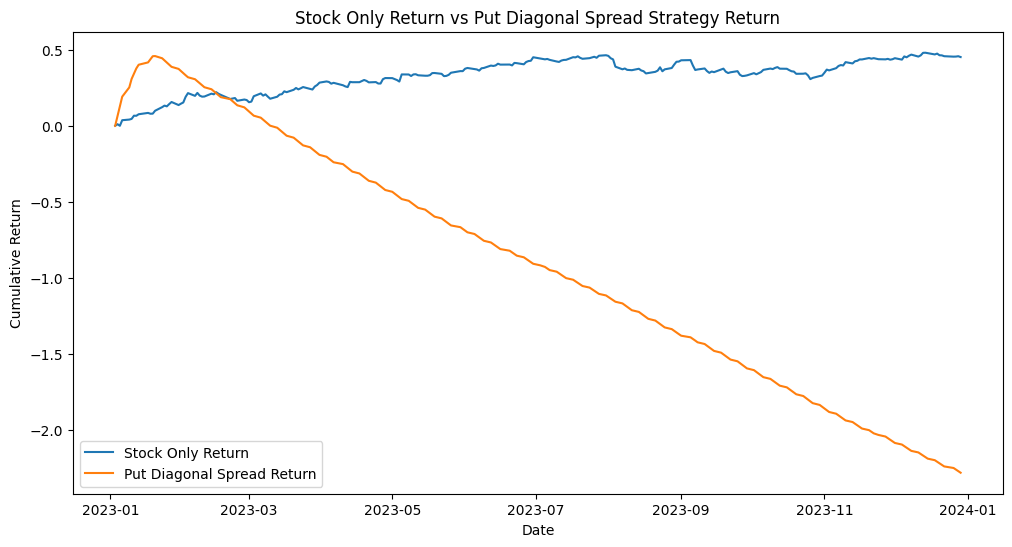

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Diagonal Spread 설정
strike_price_buy = 140
strike_price_sell = 130
premium_paid_long = 5   # 장기 풋 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_short = 3  # 단기 풋 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Diagonal Spread 수익 계산 함수
def calculate_put_diagonal_spread(stock_data, strike_price_buy, strike_price_sell, premium_paid_long, premium_received_short):
    # 풋 옵션 손익 계산 (만기일까지의 데이터로 가정)
    stock_data['Long Put Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_buy,
                                                  strike_price_buy - stock_data['Stock Price'],
                                                  0) - premium_paid_long
    stock_data['Short Put Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_sell,
                                                   stock_data['Stock Price'] - strike_price_sell,
                                                   0) + premium_received_short

    # Diagonal Spread 전략의 총 수익 계산
    stock_data['Diagonal Spread Profit'] = stock_data['Long Put Profit/Loss'] + stock_data['Short Put Profit/Loss']

    # 총 수익률 계산
    stock_data['Diagonal Spread Return'] = stock_data['Diagonal Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Diagonal Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
put_diagonal_spread_results = calculate_put_diagonal_spread(data, strike_price_buy, strike_price_sell, premium_paid_long, premium_received_short)

# 결과 출력
print(put_diagonal_spread_results[['Stock Price', 'Stock Return', 'Diagonal Spread Profit', 'Diagonal Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(put_diagonal_spread_results.index, put_diagonal_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(put_diagonal_spread_results.index, put_diagonal_spread_results['Diagonal Spread Return'].cumsum(), label='Put Diagonal Spread Return')
plt.title('Stock Only Return vs Put Diagonal Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
